# 問題導向之資料科學與機器學習應用 - Final Project
## 組名：NaN
### 組員：傅立威、施宇庭、林侑城

# Kaggle - Titanic
check out more information about the data: https://www.kaggle.com/c/titanic


* **1 Importing Libraries and Packages**
* **2 XXX**
    * 2.1 
    * 2.2 
    * 2.3 
* **3 XXX**
    * 3.1 
    * 3.2 
    * 3.3 
* **4 XXX**
    * 4.1 
    * 4.2 
    * 4.3 
    * 4.4 
* **5 XXX**
    * 5.1 
    * 5.2 

## 1. Importing Libraries and Packages

In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

## 2. Loading and Viewing Data Set

In [2]:
# read data
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

print(train_df.head())
print(train_df.shape)
print('\n')
print(test_df.head())
print(test_df.shape)

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
(8

In [3]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<font color='red'>由此我們可以發現 **Age count** 比其他的特徵都還要少。</font>

In [4]:
print(train_df.keys())
print(test_df.keys())

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


<font color='red'>另外還可以發現 **test** 的資料比 **train** 的資料還要少了 **Survived** 的欄位</font>

## 3. Plotting and Visualizing Data

Gender

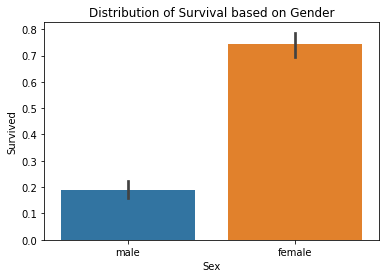

342
Total people survived is: 342
Proportion of Females who survived:
0.6812865497076024
Proportion of Males who survived:
0.31871345029239767


In [5]:
# can ignore the testing set for now
sns.barplot(x="Sex", y="Survived", data=train_df)
plt.title("Distribution of Survival based on Gender")
plt.show()

total_survived_females = train_df[train_df.Sex == "female"]["Survived"].sum()
total_survived_males = train_df[train_df.Sex == "male"]["Survived"].sum()

print(total_survived_females + total_survived_males)
print("Total people survived is: " + str((total_survived_females + total_survived_males)))
print("Proportion of Females who survived:") 
print(total_survived_females/(total_survived_females + total_survived_males))
print("Proportion of Males who survived:")
print(total_survived_males/(total_survived_females + total_survived_males))

<font color='red'>我們先來看一下 **性別** 與 **存活率** 的部分<br /> 
    training data 中的女性存活率比男性高上非常多<br /> 
    推測可能是因為禮讓女生先上救生艇，所以女性的存活率會比較高<br />
    但是因為還有很多其他因素 例如艙等<br />
    所以接下來來對艙等進行分析
</font>

Class

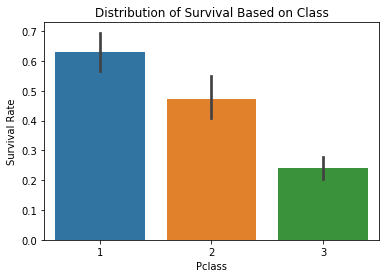

Total people survived is: 342
Proportion of Class 1 Passengers who survived:
0.39766081871345027
Proportion of Class 2 Passengers who survived:
0.2543859649122807
Proportion of Class 3 Passengers who survived:
0.347953216374269


In [6]:
sns.barplot(x="Pclass", y="Survived", data=train_df)
plt.ylabel("Survival Rate")
plt.title("Distribution of Survival Based on Class")
plt.show()

total_survived_one = train_df[train_df.Pclass == 1]["Survived"].sum()
total_survived_two = train_df[train_df.Pclass == 2]["Survived"].sum()
total_survived_three = train_df[train_df.Pclass == 3]["Survived"].sum()
total_survived_class = total_survived_one + total_survived_two + total_survived_three

print("Total people survived is: " + str(total_survived_class))
print("Proportion of Class 1 Passengers who survived:") 
print(total_survived_one/total_survived_class)
print("Proportion of Class 2 Passengers who survived:")
print(total_survived_two/total_survived_class)
print("Proportion of Class 3 Passengers who survived:")
print(total_survived_three/total_survived_class)

<font color='red'>再來看一下 **艙等** 與 **存活率** 的部分<br />
    1 : 頭等艙  2 : 商務艙  3 : 經濟艙<br /> 
    可以發現隨著艙等等級遞減 存活率也越來越低<br /> 
    推測可能是因為艙等等級越高 設備越好也比較安全<br />
    所以出事情後存活率也會比較高
</font>

Text(0.5, 1.0, 'Survival Rates Based on Gender and Class')

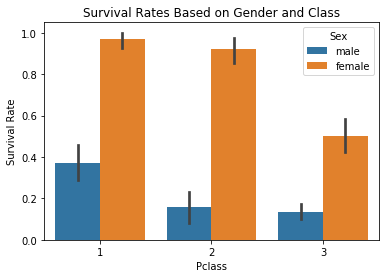

In [7]:
sns.barplot(x="Pclass", y="Survived", hue="Sex", data=train_df)
plt.ylabel("Survival Rate")
plt.title("Survival Rates Based on Gender and Class")

<font color='red'>接下來分別分析 **男性** 與 **女性** 的存活率<br />
    可以發現不管是哪一個艙等 女性存活率都還是比男性高非常多<br /> 
    所以 "因為禮讓女生先上救生艇，所以女性的存活率會比較高" 的推論又更加可能了
</font>

Text(0.5, 1.0, 'Survival Rates Based on Gender and Class')

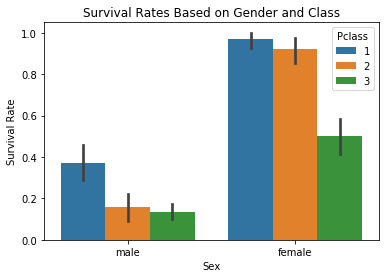

In [8]:
sns.barplot(x="Sex", y="Survived", hue="Pclass", data=train_df)
plt.ylabel("Survival Rate")
plt.title("Survival Rates Based on Gender and Class")

<font color='red'>和前一張圖一樣 換一個方式來比較而已
</font>

### 檢查離群值

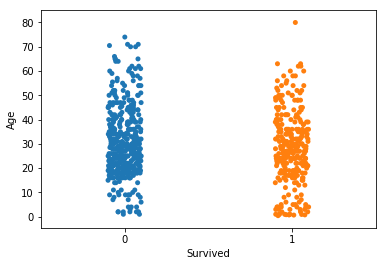

In [9]:
sns.stripplot(x="Survived", y="Age", data=train_df, jitter=True)

<font color='red'>由圖可以發現 資料中幾乎沒有太明顯的離群值
</font>

In [10]:
#sns.pairplot(train_df)

## 4.Data Preprocessing

In [11]:
# drop unnecessary columns

print(train_df.shape)
print(test_df.shape)

drop_columns_list = ['Ticket', 'Cabin', 'Name']
train_df = train_df.drop(drop_columns_list, axis=1)
test_df = test_df.drop(drop_columns_list, axis=1)

train_df = train_df.drop(['PassengerId'], axis=1)

print('\n')
print(train_df.shape)
print(test_df.shape)

(891, 12)
(418, 11)


(891, 8)
(418, 8)


In [12]:
# convert `Sex` to numerical values

print(train_df.head())

train_df['Sex'] = train_df['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
test_df['Sex'] = test_df['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

print(train_df.head())

   Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C
2         1       3  female  26.0      0      0   7.9250        S
3         1       1  female  35.0      1      0  53.1000        S
4         0       3    male  35.0      0      0   8.0500        S
   Survived  Pclass  Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    0  22.0      1      0   7.2500        S
1         1       1    1  38.0      1      0  71.2833        C
2         1       3    1  26.0      0      0   7.9250        S
3         1       1    1  35.0      1      0  53.1000        S
4         0       3    0  35.0      0      0   8.0500        S


In [13]:
# replace `Age` with ordinals

print(train_df.head())

train_df.loc[ train_df['Age'] <= 16, 'Age'] = 0
train_df.loc[(train_df['Age'] > 16) & (train_df['Age'] <= 32), 'Age'] = 1
train_df.loc[(train_df['Age'] > 32) & (train_df['Age'] <= 48), 'Age'] = 2
train_df.loc[(train_df['Age'] > 48) & (train_df['Age'] <= 64), 'Age'] = 3
train_df.loc[ train_df['Age'] > 64, 'Age']

test_df.loc[ test_df['Age'] <= 16, 'Age'] = 0
test_df.loc[(test_df['Age'] > 16) & (test_df['Age'] <= 32), 'Age'] = 1
test_df.loc[(test_df['Age'] > 32) & (test_df['Age'] <= 48), 'Age'] = 2
test_df.loc[(test_df['Age'] > 48) & (test_df['Age'] <= 64), 'Age'] = 3
test_df.loc[ test_df['Age'] > 64, 'Age']

print(train_df.head())

   Survived  Pclass  Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    0  22.0      1      0   7.2500        S
1         1       1    1  38.0      1      0  71.2833        C
2         1       3    1  26.0      0      0   7.9250        S
3         1       1    1  35.0      1      0  53.1000        S
4         0       3    0  35.0      0      0   8.0500        S
   Survived  Pclass  Sex  Age  SibSp  Parch     Fare Embarked
0         0       3    0  1.0      1      0   7.2500        S
1         1       1    1  2.0      1      0  71.2833        C
2         1       3    1  1.0      0      0   7.9250        S
3         1       1    1  2.0      1      0  53.1000        S
4         0       3    0  2.0      0      0   8.0500        S


In [14]:
# fill missing values in column `Embarked` with the most common value

common_port = train_df['Embarked'].dropna().mode()[0]
print(common_port)
train_df['Embarked'] = train_df['Embarked'].fillna(common_port)
test_df['Embarked'] = test_df['Embarked'].fillna(common_port)

# convert `Embarked` to numerical values

print(train_df.head())

train_df['Embarked'] = train_df['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
test_df['Embarked'] = test_df['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

print(train_df.head())

S
   Survived  Pclass  Sex  Age  SibSp  Parch     Fare Embarked
0         0       3    0  1.0      1      0   7.2500        S
1         1       1    1  2.0      1      0  71.2833        C
2         1       3    1  1.0      0      0   7.9250        S
3         1       1    1  2.0      1      0  53.1000        S
4         0       3    0  2.0      0      0   8.0500        S
   Survived  Pclass  Sex  Age  SibSp  Parch     Fare  Embarked
0         0       3    0  1.0      1      0   7.2500         0
1         1       1    1  2.0      1      0  71.2833         1
2         1       3    1  1.0      0      0   7.9250         0
3         1       1    1  2.0      1      0  53.1000         0
4         0       3    0  2.0      0      0   8.0500         0


In [15]:
# drop rows with missing values

print(train_df.shape)
print(test_df.shape)

train_df.dropna(inplace=True)
test_df.dropna(inplace=True)

print('\n')
print(train_df.shape)
print(test_df.shape)

(891, 8)
(418, 8)


(714, 8)
(331, 8)


In [16]:
# make training & testint data

X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()

print(X_train.shape)
print(X_train.head())
print('\n')
print(Y_train.shape)
print(Y_train.head())
print('\n')
print(X_test.shape)
print(X_test.head())
print('\n')

(714, 7)
   Pclass  Sex  Age  SibSp  Parch     Fare  Embarked
0       3    0  1.0      1      0   7.2500         0
1       1    1  2.0      1      0  71.2833         1
2       3    1  1.0      0      0   7.9250         0
3       1    1  2.0      1      0  53.1000         0
4       3    0  2.0      0      0   8.0500         0


(714,)
0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


(331, 7)
   Pclass  Sex  Age  SibSp  Parch     Fare  Embarked
0       3    0  2.0      0      0   7.8292         2
1       3    1  2.0      1      0   7.0000         0
2       2    0  3.0      0      0   9.6875         2
3       3    0  1.0      0      0   8.6625         0
4       3    1  1.0      1      1  12.2875         0




## 5.Predict & Generate submission data

### 5.1 KNN

In [17]:
# knn

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
# Y_pred = knn.predict(X_test)
acc_knn = knn.score(X_train, Y_train)
print('training accuracy: %.5f' % acc_knn)

training accuracy: 0.87115


<font color='red'>這是助教的其中一個範例程式碼<br /> 
    但是範例全部都只有 training accuracy 並沒有做 testing accuracy<br /> 
    所以接下來我們會把 training data 使用 **k fold** 的方法去做 **cross validation**<br /> 
    分成五份 把一份拿出來測試<br />
    並且做五次 每一次拿的那一份都選不一樣的
</font>

### K-fold

In [18]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits = 5) # 分成 5 等分
i = 0
for train_index, test_index in kfold.split(X_train):
    i += 1
    print("【Round {}】".format(i))
    print("Train: {} ~ {}, {} ~ {}, {} ~ {}, {} ~ {}".format(train_index[0], train_index[142],
                                                             train_index[143], train_index[285],
                                                             train_index[286], train_index[428],
                                                             train_index[429], train_index[-1],))
    print("Test: {} ~ {}\n".format(test_index[0], test_index[-1]))


【Round 1】
Train: 143 ~ 285, 286 ~ 428, 429 ~ 571, 572 ~ 713
Test: 0 ~ 142

【Round 2】
Train: 0 ~ 142, 286 ~ 428, 429 ~ 571, 572 ~ 713
Test: 143 ~ 285

【Round 3】
Train: 0 ~ 142, 143 ~ 285, 429 ~ 571, 572 ~ 713
Test: 286 ~ 428

【Round 4】
Train: 0 ~ 142, 143 ~ 285, 286 ~ 428, 572 ~ 713
Test: 429 ~ 571

【Round 5】
Train: 0 ~ 142, 143 ~ 285, 286 ~ 428, 429 ~ 571
Test: 572 ~ 713



In [19]:
# the function used to calculte accuracies with k-fold validation

def calc_acc(clf, print_out=False):  
    # parameter: a classifier object
    # 3 returns: average_train_acc, average__test_acc, all_acc_array
    
    acc_dt = np.zeros((2,5))
    i = 0
    for train_index, test_index in kfold.split(train_df):
        kfold_X_train = train_df.iloc[train_index].drop("Survived", axis=1)
        kfold_Y_train = train_df.iloc[train_index]["Survived"]
        kfold_X_test  = train_df.iloc[test_index].drop("Survived", axis=1)
        kfold_Y_test  = train_df.iloc[test_index]["Survived"]

        clf.fit(kfold_X_train, kfold_Y_train)
        acc_train = clf.score(kfold_X_train, kfold_Y_train)
        acc_test = clf.score(kfold_X_test, kfold_Y_test)
        acc_dt[0,i] = acc_train
        acc_dt[1,i] = acc_test
        i += 1
    if print_out == True:
        print("Average training accuracy: {}".format(np.mean(acc_dt[0,:])))
        print("Average testing accuracy: {}\n".format(np.mean(acc_dt[1,:])))
    return np.mean(acc_dt[0,:]), np.mean(acc_dt[1,:]), acc_dt

### 5.2 SVM

In [20]:
# support vector machine
svc = SVC()
calc_acc(svc, print_out=True)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Average training accuracy: 0.8634483729930315
Average testing accuracy: 0.7381759085984438



C:\Users\admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


(0.8634483729930315,
 0.7381759085984438,
 array([[0.84938704, 0.88966725, 0.85113835, 0.87215412, 0.8548951 ],
        [0.67132867, 0.71328671, 0.74125874, 0.76923077, 0.79577465]]))

In [21]:
# vary aboyt penalty parameter

c_range = np.arange(0.1, 1.1, 0.1)
train_result = []
test_result = []

for C in c_range:
    svc = SVC(C=C)
    print('C =', C)
    train_result.append(calc_acc(svc)[0])
    test_result.append(calc_acc(svc, True)[1])

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


C = 0.1


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

Average training accuracy: 0.6302573083658898
Average testing accuracy: 0.5617255983453167

C = 0.2


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

Average training accuracy: 0.7619009711829327
Average testing accuracy: 0.6639712400275781

C = 0.30000000000000004


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

Average training accuracy: 0.80216832204573
Average testing accuracy: 0.7045602285038904

C = 0.4


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

Average training accuracy: 0.8273811127576451
Average testing accuracy: 0.7199349945828819

C = 0.5


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

Average training accuracy: 0.8312327777301508
Average testing accuracy: 0.7227420466857086

C = 0.6


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

Average training accuracy: 0.8466400499675457
Average testing accuracy: 0.7269673987983848

C = 0.7000000000000001


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

Average training accuracy: 0.8518933780755147
Average testing accuracy: 0.7269673987983848

C = 0.8


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

Average training accuracy: 0.8571467061834838
Average testing accuracy: 0.7311730522998128

C = 0.9


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

Average training accuracy: 0.8606474961115943
Average testing accuracy: 0.7395646606914212

C = 1.0


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

Average training accuracy: 0.8634483729930315
Average testing accuracy: 0.7381759085984438



C:\Users\admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [22]:
# the function used to plot accuracies

def plot_acc(x_lb, x, y1=train_result, y2=test_result):
    line_1 = plt.plot(x, y1, label="training accuracy")
    line_2 = plt.plot(x, y2, label="testing accuracy")
    plt.xlabel(x_lb)
    plt.ylabel('accuracy')
    plt.legend()
    plt.show()

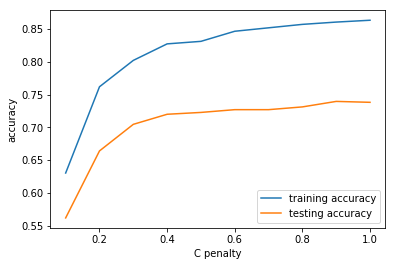

In [23]:
# plot accuracies versus penalty parameter
plot_acc(x=c_range, x_lb='C penalty')

<p style='color: red'>high C parameter(hard margin): easily overfitting</p>

In [24]:
# vary about kernel type

# kernels = ['rbf', 'linear', 'poly', 'sigmoid']
# train_result = []
# test_result = []

# for k in kernels:
#     svc = SVC(kernel=k)
#     print('C =', C)
#     train_result.append(calc_acc(svc)[0])
#     test_result.append(calc_acc(svc, True)[1])

<p style='color: red'>High cost while using non-linear kernel function on large smaple sets (> 10K)</p>

In [25]:
# plot accuracies versus kernel type
# plot_acc(x=kernels, x_lb='kernel type')

### 5.3 Decision numberTree 分析

In [26]:
# Decision numberTree
# max_depth = 1   
decision_tree = DecisionTreeClassifier(max_depth=1)  
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = decision_tree.score(X_train, Y_train)
print('training accuracy: %.5f' % acc_decision_tree)

submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('./submission_decision_tree.csv', index=False)

training accuracy: 0.78011


<font color='red'>這是 max_depth = 1 的 train accuracy 的情況

In [27]:
def out_Decision(Max_depth):
    
    decision_tree = DecisionTreeClassifier(max_depth=Max_depth)  # max_depth = 22 
    decision_tree.fit(X_train, Y_train)
    Y_pred = decision_tree.predict(X_test)
    acc_decision_tree = decision_tree.score(X_train, Y_train)
    return acc_decision_tree
    # print('training accuracy: %.5f' % acc_decision_tree)

In [28]:
# Max_depth = 1
# 測試max_depth = 多少時 training accuracy 最好
X = []
Y = []
for Max_depth in range(1,250+1):
    #print(Max_depth)
    #Max_depth=Max_depth+1
    
    #plot_acc_decision_tree = acc_decision_tree
    X.append(Max_depth)
    Y.append(out_Decision(Max_depth))

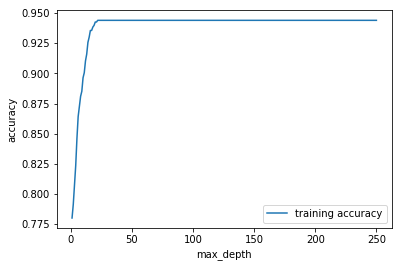

In [29]:
plt.plot(X,Y, label="training accuracy")
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()
plt.show()

<font color='red'>大約在max_depth = 22以上的時候有最佳的 training accuracy

In [30]:
# 確認類別數量
train_df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [31]:
#max_depth = 22 
acc_dt = np.zeros((2,5))
i = 0
for train_index, test_index in kfold.split(train_df):
    #print("TRAIN:", train_index, "\nTEST:", test_index)
    kfold_X_train = train_df.iloc[train_index].drop("Survived", axis=1)
    kfold_Y_train = train_df.iloc[train_index]["Survived"]
    kfold_X_test  = train_df.iloc[test_index].drop("Survived", axis=1)
    kfold_Y_test  = train_df.iloc[test_index]["Survived"]
    
    decision_tree = DecisionTreeClassifier(max_depth=22)  
    decision_tree.fit(kfold_X_train, kfold_Y_train)
    acc_train = decision_tree.score(kfold_X_train, kfold_Y_train)
    acc_test = decision_tree.score(kfold_X_test, kfold_Y_test)
    acc_dt[0,i] = acc_train
    acc_dt[1,i] = acc_test
    i+=1
print(acc_dt,'\n')
print('Average training accuracy: ',np.mean(acc_dt[0,:]),'\nAverage testing accuracy: ',np.mean(acc_dt[1,:]))

[[0.94045534 0.95271454 0.94921191 0.94395797 0.9493007 ]
 [0.78321678 0.77622378 0.76223776 0.7972028  0.80985915]] 

Average training accuracy:  0.9471280908233621 
Average testing accuracy:  0.7857480547621393


<font color='red'>train_index 就是拿來訓練的<br />
    test_index 就是拿來測試 **testing accuracy** 的<br />
    觀察上面的輸出結果可以發現 train_index 每次都會只有 1/5 的資料<br />
    而 test_index 就是缺少的那 1/5 的資料
</font>

<font color='red'>由上面的分析結果可知 training accuracy 越高不一定越好<br />
    Average training accuracy 0.947 雖然很高<br />
    Average testing accuracy  0.794 卻很低<br />
    這就是 **Overfitting** 的例子
</font>

In [32]:
D_uniform_average_training = []
D_uniform_average_testing = []


for Max_depth in range(1,22+1): #0~21 -> 1~22 
    acc_dt = np.zeros((2,5))
    i = 0
    for train_index, test_index in kfold.split(train_df):
        #print("TRAIN:", train_index, "\nTEST:", test_index)
        kfold_X_train = train_df.iloc[train_index].drop("Survived", axis=1)
        kfold_Y_train = train_df.iloc[train_index]["Survived"]
        kfold_X_test  = train_df.iloc[test_index].drop("Survived", axis=1)
        kfold_Y_test  = train_df.iloc[test_index]["Survived"]
    
        decision_tree = DecisionTreeClassifier(max_depth=Max_depth)  
        decision_tree.fit(kfold_X_train, kfold_Y_train)
        acc_train = decision_tree.score(kfold_X_train, kfold_Y_train)
        acc_test = decision_tree.score(kfold_X_test, kfold_Y_test)
        acc_dt[0,i] = acc_train
        acc_dt[1,i] = acc_test
        i+=1
    #print(acc_dt,'\n')
    print('training accuracy: ',np.mean(acc_dt[0,:]),'\ntesting accuracy: ',np.mean(acc_dt[1,:]))
    D_uniform_average_training.append(np.mean(acc_dt[0,:]))
    D_uniform_average_testing.append(np.mean(acc_dt[1,:]))

training accuracy:  0.7801134067333717 
testing accuracy:  0.7801339505564858
training accuracy:  0.7913175266064932 
testing accuracy:  0.7913326110509209
training accuracy:  0.8074259365853061 
testing accuracy:  0.774578942184576
training accuracy:  0.8315836527745459 
testing accuracy:  0.7927410617551462
training accuracy:  0.8518927657281422 
testing accuracy:  0.7913424603565449
training accuracy:  0.8700978531101123 
testing accuracy:  0.7801241012508617
training accuracy:  0.8816503986381393 
testing accuracy:  0.7815128533438392
training accuracy:  0.8928539061638887 
testing accuracy:  0.7815128533438392
training accuracy:  0.9051082017807062 
testing accuracy:  0.7857283561508914
training accuracy:  0.9145628452108312 
testing accuracy:  0.7899241603466957
training accuracy:  0.9240162639462115 
testing accuracy:  0.7885157096424702
training accuracy:  0.9296174053617137 
testing accuracy:  0.7800945533339899
training accuracy:  0.9366214346074241 
testing accuracy:  0.7885

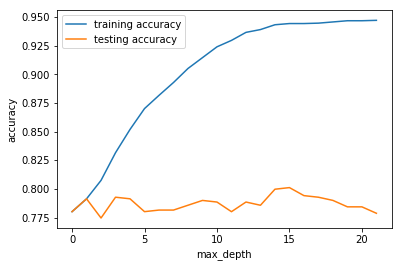

In [33]:
line1 = plt.plot(D_uniform_average_training, label="training accuracy")
line1 = plt.plot(D_uniform_average_testing, label="testing accuracy")
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()
plt.show()

<font color='red'> 增加max_depth，training accuracy會增加，但是testing accuracy則沒有明顯的增加趨勢

## 7.knn 分析

## knn leaf_size 分析

In [34]:
leaf_size_results = []

for i in range(100):
    knn = KNeighborsClassifier(n_neighbors = 3, leaf_size = (i+1))
    knn.fit(X_train, Y_train)
    Y_pred = knn.predict(X_test)
    acc_knn = knn.score(X_train, Y_train)
    print("n_neighbors = %2d, training accuracy: %.5f" %(i+1, acc_knn))
    leaf_size_results.append(acc_knn)

n_neighbors =  1, training accuracy: 0.86555
n_neighbors =  2, training accuracy: 0.85154
n_neighbors =  3, training accuracy: 0.86555
n_neighbors =  4, training accuracy: 0.86555
n_neighbors =  5, training accuracy: 0.86555
n_neighbors =  6, training accuracy: 0.86695
n_neighbors =  7, training accuracy: 0.86695
n_neighbors =  8, training accuracy: 0.86695
n_neighbors =  9, training accuracy: 0.86695
n_neighbors = 10, training accuracy: 0.86695
n_neighbors = 11, training accuracy: 0.86695
n_neighbors = 12, training accuracy: 0.87115
n_neighbors = 13, training accuracy: 0.87115
n_neighbors = 14, training accuracy: 0.87115
n_neighbors = 15, training accuracy: 0.87115
n_neighbors = 16, training accuracy: 0.87115
n_neighbors = 17, training accuracy: 0.87115
n_neighbors = 18, training accuracy: 0.87115
n_neighbors = 19, training accuracy: 0.87115
n_neighbors = 20, training accuracy: 0.87115
n_neighbors = 21, training accuracy: 0.87115
n_neighbors = 22, training accuracy: 0.87115
n_neighbor

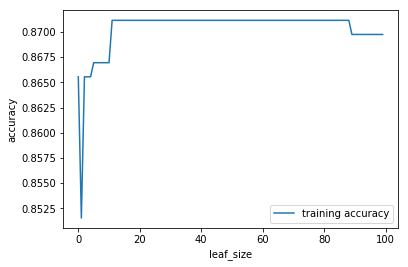

In [35]:
line1 = plt.plot(leaf_size_results, label="training accuracy")
plt.xlabel('leaf_size')
plt.ylabel('accuracy')
plt.legend()
plt.show()

<font color='red'>這邊單純是測試 leaf_size 對 accuracy 的影響如何<br />
    可以發現 leaf_size 在 15 ~ 90 之間的結果都是最好的而且完全相同<br />
    所以這邊就先不比較 training 跟 testing 的差異了<br />
    只要記得 leaf_size 要選在這一個範圍內會比較好<br />
    **後面的實驗 leaf_size 統一使用 30**
</font>

### weights 使用 uniform
***

In [36]:
uniform_results = []

for i in range(20):
    knn = KNeighborsClassifier(n_neighbors = i+1)
    knn.fit(X_train, Y_train)
    # Y_pred = knn.predict(X_test)
    acc_knn = knn.score(X_train, Y_train)
    print("n_neighbors = %2d, training accuracy: %.5f" %(i+1, acc_knn))
    uniform_results.append(acc_knn)

n_neighbors =  1, training accuracy: 0.92297
n_neighbors =  2, training accuracy: 0.84594
n_neighbors =  3, training accuracy: 0.87115
n_neighbors =  4, training accuracy: 0.84454
n_neighbors =  5, training accuracy: 0.83754
n_neighbors =  6, training accuracy: 0.81232
n_neighbors =  7, training accuracy: 0.81793
n_neighbors =  8, training accuracy: 0.79832
n_neighbors =  9, training accuracy: 0.80252
n_neighbors = 10, training accuracy: 0.78852
n_neighbors = 11, training accuracy: 0.79272
n_neighbors = 12, training accuracy: 0.77591
n_neighbors = 13, training accuracy: 0.76611
n_neighbors = 14, training accuracy: 0.76331
n_neighbors = 15, training accuracy: 0.76331
n_neighbors = 16, training accuracy: 0.75350
n_neighbors = 17, training accuracy: 0.75210
n_neighbors = 18, training accuracy: 0.74650
n_neighbors = 19, training accuracy: 0.75070
n_neighbors = 20, training accuracy: 0.74230


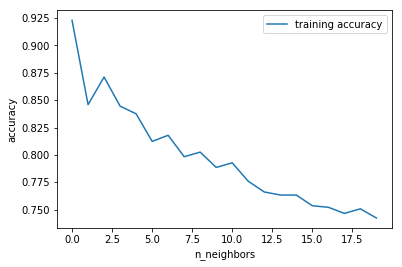

In [37]:
line1 = plt.plot(uniform_results, label="training accuracy")
plt.xlabel('n_neighbors')
plt.ylabel('accuracy')
plt.legend()
plt.show()

<font color='red'>可以發現當 n_neighbors 增加的時候 accuracy 是往下掉的<br />
    接下來分析 **testing accuracy** 的部分
</font>

In [38]:
# knn testing accuracy 分析

uniform_average_training = []
uniform_average_testing = []

for i in range(20):
    acc_dt = np.zeros((2,5))
    j = 0
    for train_index, test_index in kfold.split(train_df):
        kfold_X_train = train_df.iloc[train_index].drop("Survived", axis=1)
        kfold_Y_train = train_df.iloc[train_index]["Survived"]
        kfold_X_test  = train_df.iloc[test_index].drop("Survived", axis=1)
        kfold_Y_test  = train_df.iloc[test_index]["Survived"]

        knn = KNeighborsClassifier(n_neighbors = i+1, leaf_size = 30)
        knn.fit(kfold_X_train, kfold_Y_train)
        acc_train = knn.score(kfold_X_train, kfold_Y_train)
        acc_test = knn.score(kfold_X_test, kfold_Y_test)
        acc_dt[0,j] = acc_train
        acc_dt[1,j] = acc_test
        j+=1
    # print(acc_dt,'\n')
    print('Average training accuracy: ',np.mean(acc_dt[0,:]),' Average testing accuracy: ',np.mean(acc_dt[1,:]))
    
    uniform_average_training.append(np.mean(acc_dt[0,:]))
    uniform_average_testing.append(np.mean(acc_dt[1,:]))

Average training accuracy:  0.9247204634244914  Average testing accuracy:  0.7143110410716045
Average training accuracy:  0.8410376838572985  Average testing accuracy:  0.7059095833743722
Average training accuracy:  0.8592476700182481  Average testing accuracy:  0.7268886043533931
Average training accuracy:  0.832633828518242  Average testing accuracy:  0.7353097606618733
Average training accuracy:  0.8354340930523068  Average testing accuracy:  0.7381463606815719
Average training accuracy:  0.8098728766854861  Average testing accuracy:  0.7268984536590171
Average training accuracy:  0.8144220053151752  Average testing accuracy:  0.7353196099674972
Average training accuracy:  0.8032172730946812  Average testing accuracy:  0.7227223480744608
Average training accuracy:  0.8004170085606163  Average testing accuracy:  0.7311238057716932
Average training accuracy:  0.783618483093089  Average testing accuracy:  0.7156899438589579
Average training accuracy:  0.7766162908894958  Average testin

### weights 使用 uniform 的 training accuracy V.S. testing accuracy (平均值)

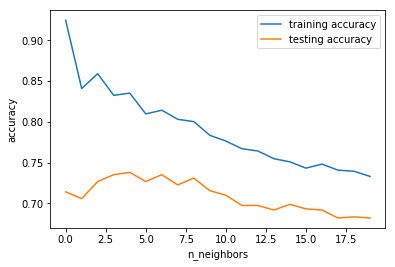

In [39]:
line1 = plt.plot(uniform_average_training, label="training accuracy")
line1 = plt.plot(uniform_average_testing, label="testing accuracy")
plt.xlabel('n_neighbors')
plt.ylabel('accuracy')
plt.legend()
plt.show()

<font color='red'>可以發現最一開始 n_neighbors=1 時的 training accuracy 最高<br />
    但是 testing accuracy 並不是最高<br />
    這就是因為 Overfitting 的關係
</font>

### weights 使用 distance
***

In [40]:
distance_results = []

for i in range(20):
    knn = KNeighborsClassifier(n_neighbors = i+1, weights = 'distance', leaf_size = 3)
    knn.fit(X_train, Y_train)
    Y_pred = knn.predict(X_test)
    acc_knn = knn.score(X_train, Y_train)
    print("n_neighbors = %2d, training accuracy: %.5f" %(i+1, acc_knn))
    distance_results.append(acc_knn)

n_neighbors =  1, training accuracy: 0.91877
n_neighbors =  2, training accuracy: 0.93557
n_neighbors =  3, training accuracy: 0.94118
n_neighbors =  4, training accuracy: 0.94398
n_neighbors =  5, training accuracy: 0.94398
n_neighbors =  6, training accuracy: 0.94398
n_neighbors =  7, training accuracy: 0.94398
n_neighbors =  8, training accuracy: 0.94398
n_neighbors =  9, training accuracy: 0.94398
n_neighbors = 10, training accuracy: 0.94398
n_neighbors = 11, training accuracy: 0.94398
n_neighbors = 12, training accuracy: 0.94398
n_neighbors = 13, training accuracy: 0.94398
n_neighbors = 14, training accuracy: 0.94398
n_neighbors = 15, training accuracy: 0.94398
n_neighbors = 16, training accuracy: 0.94398
n_neighbors = 17, training accuracy: 0.94398
n_neighbors = 18, training accuracy: 0.94398
n_neighbors = 19, training accuracy: 0.94398
n_neighbors = 20, training accuracy: 0.94398


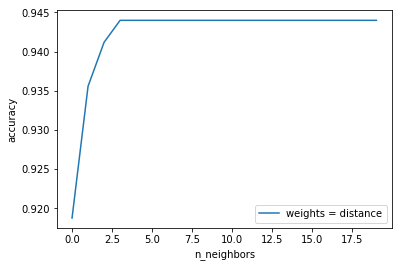

In [41]:
line1 = plt.plot(distance_results, label="weights = distance")
plt.xlabel('n_neighbors')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [42]:
# knn testing accuracy 分析

distance_average_training = []
distance_average_testing = []

for i in range(20):
    acc_dt = np.zeros((2,5))
    j = 0
    for train_index, test_index in kfold.split(train_df):
        kfold_X_train = train_df.iloc[train_index].drop("Survived", axis=1)
        kfold_Y_train = train_df.iloc[train_index]["Survived"]
        kfold_X_test  = train_df.iloc[test_index].drop("Survived", axis=1)
        kfold_Y_test  = train_df.iloc[test_index]["Survived"]

        knn = KNeighborsClassifier(n_neighbors = i+1, weights = 'distance', leaf_size = 30)
        knn.fit(kfold_X_train, kfold_Y_train)
        acc_train = knn.score(kfold_X_train, kfold_Y_train)
        acc_test = knn.score(kfold_X_test, kfold_Y_test)
        acc_dt[0,j] = acc_train
        acc_dt[1,j] = acc_test
        j+=1
    # print(acc_dt,'\n')
    print('Average training accuracy: ',np.mean(acc_dt[0,:]),' Average testing accuracy: ',np.mean(acc_dt[1,:]))
    
    distance_average_training.append(np.mean(acc_dt[0,:]))
    distance_average_testing.append(np.mean(acc_dt[1,:]))

Average training accuracy:  0.9247204634244914  Average testing accuracy:  0.7143110410716045
Average training accuracy:  0.9362736212998911  Average testing accuracy:  0.7311139564660691
Average training accuracy:  0.9415257247131151  Average testing accuracy:  0.7212941987589876
Average training accuracy:  0.9471280908233621  Average testing accuracy:  0.75214222397321
Average training accuracy:  0.9471280908233621  Average testing accuracy:  0.7395252634689254
Average training accuracy:  0.9471280908233621  Average testing accuracy:  0.7521225253619619
Average training accuracy:  0.9471280908233621  Average testing accuracy:  0.7450901211464591
Average training accuracy:  0.9471280908233621  Average testing accuracy:  0.7535408253718112
Average training accuracy:  0.9471280908233621  Average testing accuracy:  0.7479070225549099
Average training accuracy:  0.9471280908233621  Average testing accuracy:  0.7479070225549098
Average training accuracy:  0.9471280908233621  Average testin

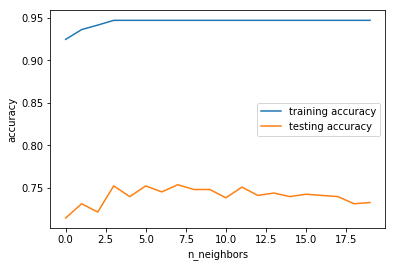

In [43]:
line1 = plt.plot(distance_average_training, label="training accuracy")
line2 = plt.plot(distance_average_testing, label="testing accuracy")
plt.xlabel('n_neighbors')
plt.ylabel('accuracy')
plt.legend()
plt.show()

<font color='red'>testing accuracy 仍然還是小於 training accuracy<br />
    接下來直接比較使用 uniform 和 distance 方法的差別
</font>

## uniform V.S. distance
***

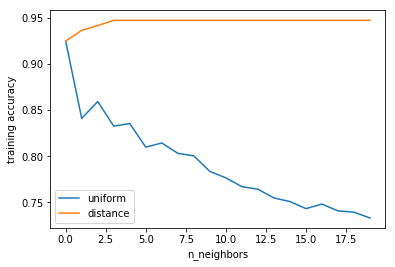

In [44]:
line1 = plt.plot(uniform_average_training, label="uniform")
line3 = plt.plot(distance_average_training, label="distance")
plt.xlabel('n_neighbors')
plt.ylabel('training accuracy')
plt.legend()
plt.show()

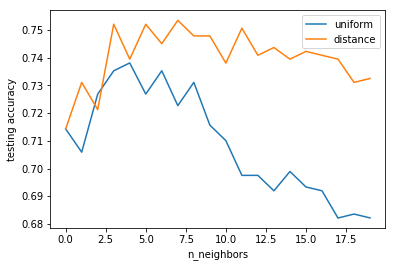

In [45]:
line2 = plt.plot(uniform_average_testing, label="uniform")
line4 = plt.plot(distance_average_testing, label="distance")
plt.xlabel('n_neighbors')
plt.ylabel('testing accuracy')
plt.legend()
plt.show()

<font color='red'>把剛剛的 uniform 拿來和 distance 比較<br />
    可以發現不論在 training 還是 testing<br />
    weights 使用 distance 的結果都明顯好了很多
</font>

## <font color='blue'> 結論1 : knn演算法 把距離因素考量進去會對預測結果加分 </font>
## <font color='blue'> 結論2 : knn演算法 對於預測未知的資料效果會比較差一點 </font>